In [ ]:
# # LSTM 2
# # Load the saved model
# import warnings
# warnings.filterwarnings("ignore")

# import numpy as np
# from ifxAvian import Avian
# from scipy import signal
# import matplotlib.pyplot as plt
# import csv
# import joblib
# import pandas as pd
# from tensorflow.keras.models import load_model
# from sklearn.preprocessing import LabelEncoder
# import tensorflow as tf

# # Load the dataset from a CSV file
# df = pd.read_csv('dataset_ALL_10.csv')

# # Separate the features and labels
# X = df.iloc[:, :-1].values
# y = df.iloc[:, -1].values

# # Convert the labels to numeric representation using LabelEncoder
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)


# # model = load_model('lstm_model1.h5')
# model = tf.keras.models.load_model('MODEL1.h5')
# df1 = pd.read_csv('dataset_ALL_4.csv')
# new_data = df1.drop('GESTURE', axis=1)

# # Prepare new data instance for prediction
# new_data = new_data.values.reshape(1, 1, 3072)

# # Make predictions on the new data instance
# predictions = model.predict(new_data)
# predicted_class = np.argmax(predictions)

# # Decode the predicted class using LabelEncoder
# predicted_class = label_encoder.inverse_transform([y])

# print(predictions)
# print("Predicted Class:", predicted_class[0])


34/34 [==============================] - 2s 14ms/step


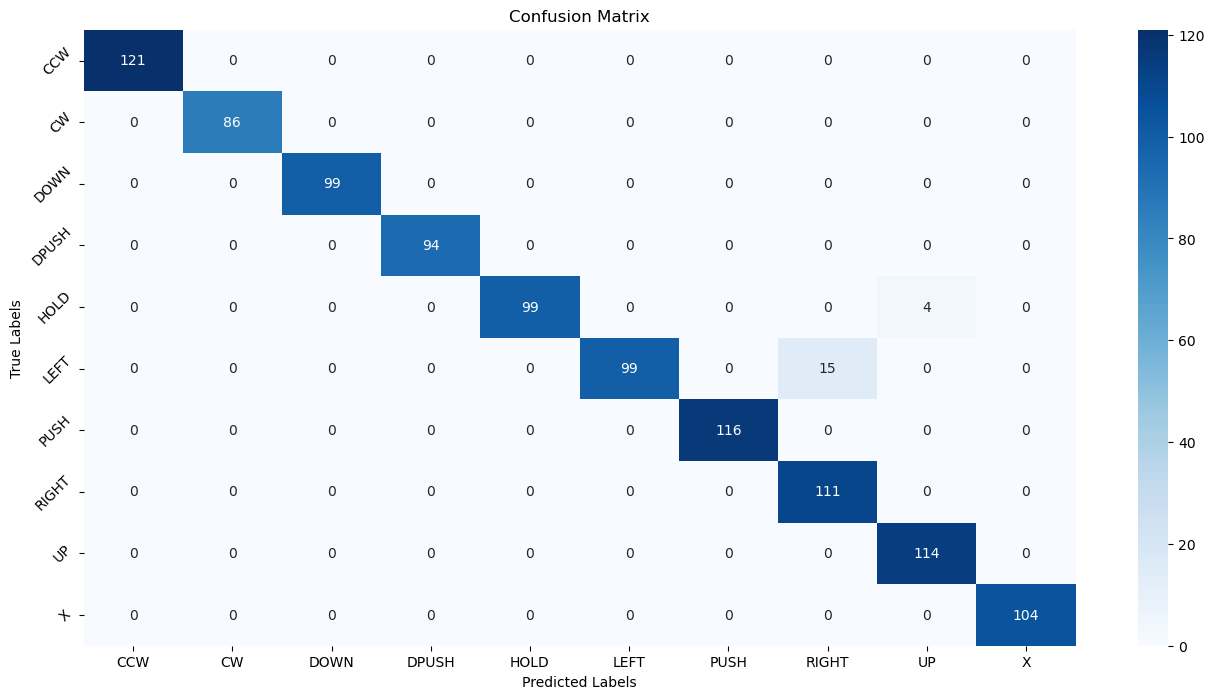

Accuracy: 0.9793


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pandas as pd
import numpy as np

model = tf.keras.models.load_model('BI_LSTM_2_SIGMOID.h5')
# Read the CSV file with complex numbers
df = pd.read_csv('dataset_ALL_10.csv')
# Shuffle the rows of the DataFrame
shuffled_df = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
shuffled_df = shuffled_df.reset_index(drop=True)
data = shuffled_df

# Split the data into features and labels
X = data.iloc[:, :-1].values  # Features

y = data.iloc[:, -1].values   # Labels

# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the LSTM input shape [samples, time steps, features]
time_steps = 1  # Each sample contains one time step
num_features = X.shape[1]
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, num_features))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, num_features))

# Convert labels to categorical one-hot vectors
num_classes = len(np.unique(y))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


y_pred_probabilities = model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1 for binary classification)
y_pred = np.argmax(y_pred_probabilities, axis=1)

y_pred1 = label_encoder.inverse_transform(y_pred)

y_true = np.argmax(y_test, axis=1)
y_true1 = label_encoder.inverse_transform(y_true)

unique_labels = np.unique(label_encoder.inverse_transform(y))
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

xtick_labels = ['CCW', 'CW', 'DOWN', 'DPUSH', 'HOLD', 'LEFT', 'PUSH', 'RIGHT', 'UP', 'X']
xtick_labels_pos = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5]
# plt.xticks(np.arange(len(unique_labels)), np.unique(y_pred1))
# plt.yticks(np.arange(len(unique_labels)), np.unique(y_true1))
plt.xticks(xtick_labels_pos, xtick_labels)
plt.yticks(xtick_labels_pos, xtick_labels, rotation=45)



plt.show()

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
np.unique(y_true1)